In [1]:
import turtle
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation

In [2]:
win = turtle.Screen()

body1 = turtle.Turtle()
body1.hideturtle()
body1.color("red")

body2 = turtle.Turtle()
body2.hideturtle()
body2.color("blue")

body3 = turtle.Turtle()
body3.hideturtle()
body3.color("green")

In [3]:
"""
Functions/how to do this:

    1) Calculating points
        - Heun's Method
        - Produces dataframe

    2) Calculating path
        - Takes in points from Heun's method
        - Scale points to make sure they fit the screen
            -> Each body has to have the same scale
        - Find distance between points
            -> x distances
            -> y distances
            -> angle from (x1, y1) to (x2, y2)
        - Add each to an array/dataframe

    3) Moving together
        - Define speed (idk why but you have to do this or else it won't work)
        - Pen down
        - for loop (go through the points)
            -> body.forward(speed)
            -> yield(0)
    
    4) Actually move
        - Define motions
        - while loop
        

"""

"\nFunctions/how to do this:\n\n    1) Calculating points\n        - Heun's Method\n        - Produces dataframe\n\n    2) Calculating path\n        - Takes in points from Heun's method\n        - Scale points to make sure they fit the screen\n            -> Each body has to have the same scale\n        - Find distance between points\n            -> x distances\n            -> y distances\n            -> angle from (x1, y1) to (x2, y2)\n        - Add each to an array/dataframe\n\n    3) Moving together\n        - Define speed (idk why but you have to do this or else it won't work)\n        - Pen down\n        - for loop (go through the points)\n            -> body.forward(speed)\n            -> yield(0)\n    \n    4) Actually move\n        - Define motions\n        - while loop\n        \n\n"

In [4]:
def heun(p0: np.array, N: int, t: float) -> np.array:
   
    data = [p0[0], p0[1], p0[2], p0[3], p0[4], p0[5], 
            p0[6], p0[7], p0[8], p0[9], p0[10], p0[11], 
            derivative(p0)[6], derivative(p0)[7], derivative(p0)[8], 
            derivative(p0)[9], derivative(p0)[10], derivative(p0)[11]]
    df = pd.DataFrame(data=[data], columns=['P1: X Position', 'P2: X Position', 
                                'P3: X Position', 'P1: Y Position', 'P2: Y Position', 
                                'P3: Y Position', 'P1: X Velocity', 'P2: X Velocity', 
                                'P3: X Velocity', 'P1: Y Velocity', 'P2: Y Velocity', 
                                'P3: Y Velocity', 'P1: X Acceleration', 'P2: X Acceleration', 
                                'P3: X Acceleration', 'P1: Y Acceleration', 'P2: Y Acceleration', 
                                'P3: Y Acceleration'])
    # TODO: verify times and step sizes are correct
    for i in range(0, N):
        ptemp = p0 + t * derivative(p0)
        dp0 = derivative(p0)
        dptemp = derivative(ptemp)
        p0 = p0 + t/2 * (dp0 + dptemp)
        data = [p0[0], p0[1], p0[2], p0[3], p0[4], p0[5], p0[6], p0[7], p0[8], p0[9], p0[10], p0[11], 
            derivative(p0)[6], derivative(p0)[7], derivative(p0)[8], derivative(p0)[9], derivative(p0)[10], 
            derivative(p0)[11]]
        df2 = pd.DataFrame(data=[data], columns=['P1: X Position', 'P2: X Position', 
                                'P3: X Position', 'P1: Y Position', 'P2: Y Position', 
                                'P3: Y Position', 'P1: X Velocity', 'P2: X Velocity', 
                                'P3: X Velocity', 'P1: Y Velocity', 'P2: Y Velocity', 
                                'P3: Y Velocity', 'P1: X Acceleration', 'P2: X Acceleration', 
                                'P3: X Acceleration', 'P1: Y Acceleration', 'P2: Y Acceleration', 
                                'P3: Y Acceleration'])
        df2['P1: X Position'] = p0[0]
        df2['P2: X Position'] = p0[1]
        df2['P3: X Position'] = p0[2]
        df2['P1: Y Position'] = p0[3]
        df2['P2: Y Position'] = p0[4]
        df2['P3: Y Position'] = p0[5]
        df2['P1: X Velocity'] = p0[6]
        df2['P2: X Velocity'] = p0[7]
        df2['P3: X Velocity'] = p0[8]
        df2['P1: Y Velocity'] = p0[9]
        df2['P2: Y Velocity'] = p0[10]
        df2['P3: Y Velocity'] = p0[11]
        df = pd.concat([df, df2], ignore_index=True)
    
    df.insert(0, 'Time', [i * t for i in range(0, N + 1)])
    return df


def derivative(p0: np.array):
    p1 = 0 * p0
    p1[0] = p0[6]
    p1[1] = p0[7]
    p1[2] = p0[8]
    p1[3] = p0[9]
    p1[4] = p0[10]
    p1[5] = p0[11]
    p1[6] = - ((p0[0] - p0[1])/((p0[0]-p0[1])**2+(p0[3]-p0[4])**2)**(3/2)) - ((p0[0] - p0[2])/((p0[0]-p0[2])**2+(p0[3]-p0[5])**2)**(3/2))
    p1[7] = - ((p0[1] - p0[0])/((p0[1]-p0[0])**2+(p0[4]-p0[3])**2)**(3/2)) - ((p0[1] - p0[2])/((p0[1]-p0[2])**2+(p0[4]-p0[5])**2)**(3/2))
    p1[8] = - ((p0[2] - p0[0])/((p0[2]-p0[0])**2+(p0[5]-p0[3])**2)**(3/2)) - ((p0[2] - p0[1])/((p0[2]-p0[1])**2+(p0[5]-p0[4])**2)**(3/2))
    p1[9] = - ((p0[3] - p0[4])/((p0[0]-p0[1])**2+(p0[3]-p0[4])**2)**(3/2)) - ((p0[3] - p0[5])/((p0[0]-p0[2])**2+(p0[3]-p0[5])**2)**(3/2))
    p1[10] = - ((p0[4] - p0[3])/((p0[1]-p0[0])**2+(p0[4]-p0[3])**2)**(3/2)) - ((p0[4] - p0[5])/((p0[1]-p0[2])**2+(p0[4]-p0[5])**2)**(3/2))
    p1[11] = - ((p0[5] - p0[3])/((p0[2]-p0[0])**2+(p0[5]-p0[3])**2)**(3/2)) - ((p0[5] - p0[4])/((p0[2]-p0[1])**2+(p0[5]-p0[4])**2)**(3/2))
    return p1

In [5]:
p = np.array([-1, 1, 0, 0, 0, 0, 0.347113, 0.347113, -0.694226, 0.532727, 0.532727, -1.065454])
d = heun(p, 3000, 0.001)
print(d)


       Time  P1: X Position  P2: X Position  P3: X Position  P1: Y Position  \
0     0.000       -1.000000        1.000000        0.000000        0.000000   
1     0.001       -0.999652        1.000346       -0.000694        0.000533   
2     0.002       -0.999303        1.000692       -0.001388        0.001065   
3     0.003       -0.998953        1.001036       -0.002083        0.001598   
4     0.004       -0.998602        1.001378       -0.002777        0.002131   
...     ...             ...             ...             ...             ...   
2996  2.996        0.960382       -0.772696       -0.187686        0.413886   
2997  2.997        0.959992       -0.773448       -0.186544        0.414264   
2998  2.998        0.959601       -0.774198       -0.185403        0.414641   
2999  2.999        0.959209       -0.774948       -0.184262        0.415019   
3000  3.000        0.958817       -0.775696       -0.183121        0.415396   

      P2: Y Position  P3: Y Position  P1: X Velocit

In [66]:
def path2(p, N, t, x_var, y_var):
    H = heun(p, N, t)
    x = H[x_var]
    y = H[y_var]

    df1 = pd.DataFrame(columns=['x', 'y', 'x_path', 'y_path', 'hyp'])
    df2 = pd.DataFrame(columns=['ang_temp', 'angle'])
    
    x_path = np.zeros((N,))
    y_path = np.zeros((N,))
    hyp = np.zeros((N,))
    ang_temp = np.zeros((N,))
    angle = np.zeros((N,))

    for i in range(0, N):
        x_path[i] = x[i+1] - x[i]
        x_path[i] = x_path[i] * 10000

        y_path[i] = y[i+1] - y[i]
        y_path[i] = y_path[i] * 10000

        hyp[i] = math.sqrt((x_path[i])**2 + (y_path[i])**2)

        data = [x[i], y[i], x_path[i], y_path[i], hyp[i]]
        df3 = pd.DataFrame([data], columns = ['x', 'y', 'x_path', 'y_path', 'hyp'])
        df1 = pd.concat([df3,df1], ignore_index=True)

        # if x_path[i] > 0 and y_path[i] > 0:
        #     hyp[i] = math.sqrt((x_path[i])**2 + (y_path[i])**2)
        # else:
        #     hyp[i] = - math.sqrt((x_path[i])**2 + (y_path[i])**2)


    if y_path[0] > 0:
            ang_temp[0] = math.degrees(math.acos(((x_path[0])**2 + (hyp[0])**2 - (y_path[0])**2)/(2 * (x_path[0]) * (hyp[0]))))
    else:
            ang_temp[0] = - math.degrees(math.acos(((x_path[0])**2 + (hyp[0])**2 - (y_path[0])**2)/(2 * (x_path[0]) * (hyp[0]))))
    angle[0] = ang_temp[0]

    for i in range(1, N):
        m = (x_path[i])**2 + (hyp[i])**2 - (y_path[i])**2

        if y[i-1] > 0:
            ang_temp[i] = math.degrees(math.acos(m/(2 * (x_path[i]) * (hyp[i]))))
        else:
            ang_temp[i] = - math.degrees(math.acos(m/(2 * (x_path[i]) * (hyp[i]))))

        angle[i] = ang_temp[i] - ang_temp[i-1]
        data2 = [ang_temp[i], angle[i]]
        df4 = pd.DataFrame([data2], columns=['ang_temp', 'angle'])
        df2 = pd.append([df2,df4], ignore_index=True)
        
    
    return (hyp, angle, x, y, x_path, y_path), df1, df2

In [67]:
p = np.array([-1, 1, 0, 0, 0, 0, 0.347113, 0.347113, -0.694226, 0.532727, 0.532727, -1.065454])
d, df1, df2 = path2(p, 3000, 0.001,'P3: X Position', 'P3: Y Position')
df1
df2


/var/folders/4k/r2y24bnd4rv9vm6zpj6n8md40000gn/T/ipykernel_30680/3885247329.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df1 = pd.concat([df3,df1], ignore_index=True)


AttributeError: module 'pandas' has no attribute 'append'

In [91]:
def path3(p, N, t, x_var, y_var):
    H = heun(p, N, t)
    x = H[x_var]
    y = H[y_var]

    df1 = pd.DataFrame(columns=['x', 'y', 'x_path', 'y_path', 'hyp'])
    df2 = pd.DataFrame(columns=['ang_temp', 'angle'])
    
    x_path = np.zeros((N,))
    y_path = np.zeros((N,))
    hyp = np.zeros((N,))
    ang_temp = np.zeros((N,))
    angle = np.zeros((N,))

    for i in range(0, N):

        x_path[i] = x[i+1] - x[i]
        x_path[i] = x_path[i] * 1

        y_path[i] = y[i+1] - y[i]
        y_path[i] = y_path[i] * 1

        hyp[i] = math.sqrt((x_path[i])**2 + (y_path[i])**2)

        data = [x[i], y[i], x_path[i], y_path[i], hyp[i]]
        df3 = pd.DataFrame([data], columns=['x', 'y', 'x_path', 'y_path', 'hyp'])
        df1 = pd.concat([df1,df3], ignore_index=True)


    if y_path[0] > 0:
            ang_temp = math.degrees(math.acos(((x_path[0])**2 + (hyp[0])**2 - (y_path[0])**2)/(2 * (x_path[0]) * (hyp[0]))))
    else:
            ang_temp = - math.degrees(math.acos(((x_path[0])**2 + (hyp[0])**2 - (y_path[0])**2)/(2 * (x_path[0]) * (hyp[0]))))
    angle = ang_temp

    for i in range(1, N):
        m = (x_path[i])**2 + (hyp[i])**2 - (y_path[i])**2

        if y[i-1] > 0:
            ang_temp = math.degrees(math.acos(m/(2 * (x_path[i]) * (hyp[i]))))
        else:
            ang_temp = - math.degrees(math.acos(m/(2 * (x_path[i]) * (hyp[i]))))

        angle = ang_temp[i] - ang_temp[i-1]
        data2 = [ang_temp, angle]
        df4 = pd.DataFrame([data2], columns=['ang_temp', 'angle'])
        df2 = pd.concat([df2,df4], ignore_index=True)
        
    
    return (hyp, angle, x, y, x_path, y_path), df1, df2

In [92]:
p = np.array([-1, 1, 0, 0, 0, 0, 0.347113, 0.347113, -0.694226, 0.532727, 0.532727, -1.065454])
d, df1, df2 = path2(p, 3000, 0.001,'P3: X Position', 'P3: Y Position')
print(d)


/var/folders/4k/r2y24bnd4rv9vm6zpj6n8md40000gn/T/ipykernel_30680/3885247329.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df1 = pd.concat([df3,df1], ignore_index=True)


AttributeError: module 'pandas' has no attribute 'append'

In [11]:
def moveTogether(body, p, N, t, x_var, y_var):
    speed = body.speed()
    body.pendown()

    hyp, angle, x, y = path(p, N, t, x_var, y_var)

    body.penup()
    body.setposition(x[0], y[0])
    print(body.pos())
    body.pendown()

    for (i,j) in zip(hyp, angle):
        body.forward(i)
        body.right(j)
        yield(0)
    
    body.penup()

In [9]:
def draw(p, N, t):
    
    motion1 = moveTogether(body1, p, N, t, 'P1: X Position', 'P1: Y Position')
    motion2 = moveTogether(body2, p, N, t, 'P2: X Position', 'P2: Y Position')
    motion3 = moveTogether(body3, p, N, t, 'P3: X Position', 'P3: Y Position')

    while (next(motion1, 1) + next(motion2, 1) + next(motion3, 1) < 3):
        pass

In [12]:
p = np.array([-1, 1, 0, 0, 0, 0, 0.347113, 0.347113, -0.694226, 0.532727, 0.532727, -1.065454])
draw(p, 3000, 0.001)

TclError: invalid command name ".!canvas"

In [ ]:
win.exitonclick()

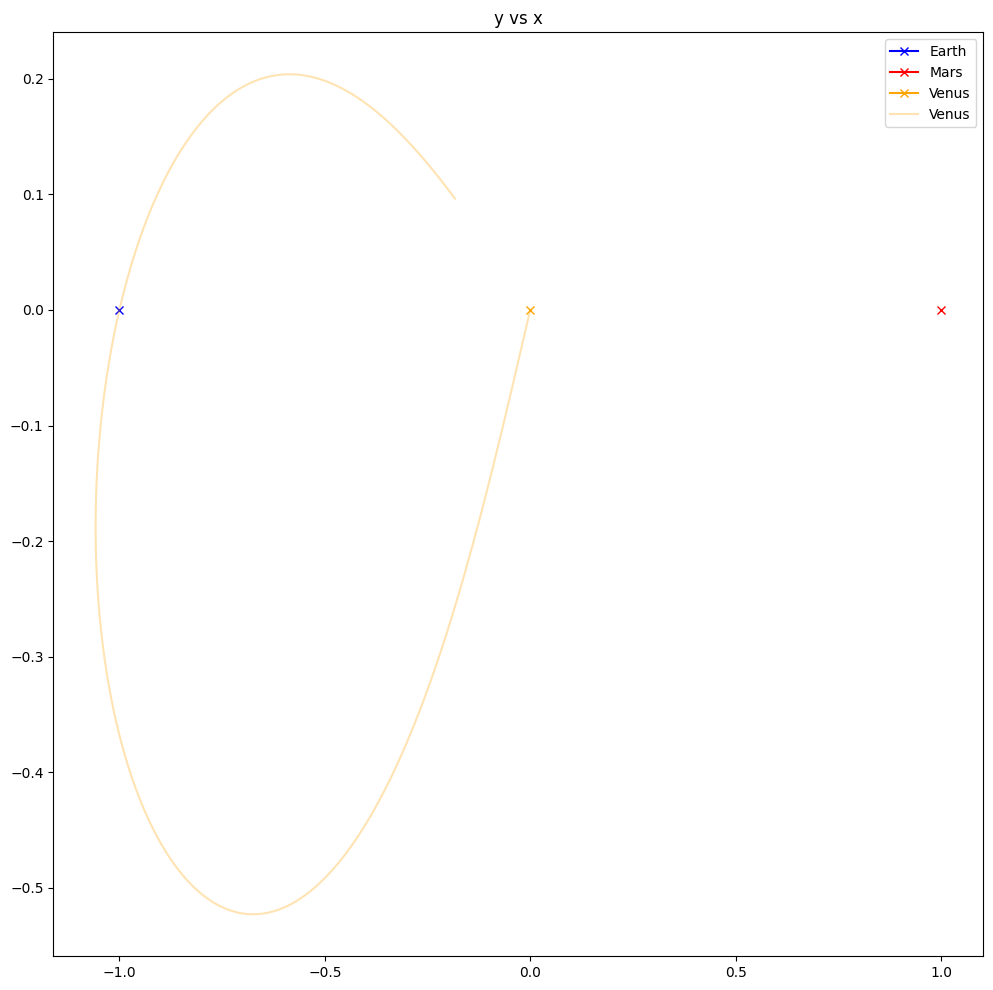

In [29]:
p = np.array([-1, 1, 0, 0, 0, 0, 0.347113, 0.347113, -0.694226, 0.532727, 0.532727, -1.065454])
d = heun(p, 3000, 0.001)

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("y vs x")
ax.plot(d['P1: X Position'][0], d['P1: Y Position'][0], c='blue', marker='x', label='Earth')
ax.plot(d['P2: X Position'][0], d['P2: Y Position'][0], c='red', marker='x',label='Mars')
ax.plot(d['P3: X Position'][0], d['P3: Y Position'][0], c='orange', marker='x', label='Venus')
# ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', alpha=0.3, label='Earth')
# ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', alpha=0.3, label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', alpha=0.3, label='Venus')
ax.legend()
plt.show()